In [1]:
# Open data from files
from csv import DictReader

with open('_data/fluidized_bed.csv', 'r') as csv_file:
    reader = DictReader(csv_file)
    rows_fb = [r for r in reader]
csv_file.close()

with open('_data/batch_reactor.csv', 'r') as csv_file:
    reader = DictReader(csv_file)
    rows_br = [r for r in reader]
csv_file.close()

with open('_data/tubular_reactor.csv', 'r') as csv_file:
    reader = DictReader(csv_file)
    rows_tr = [r for r in reader]
csv_file.close()

rows_all = rows_fb[:]
rows_all.extend(rows_br)
rows_all.extend(rows_tr)

INPUT_VARS = [
    'Reaction Time (s)',
    'Temperature (C)',
    'Particle size (mm)',
    'Moisture',
    'Ash',
    'C',
    'H',
    'N',
    'O'
]

TARGET_VARS = ['Oil', 'Char', 'Gas']

In [2]:
from typing import List, Tuple
import numpy as np

def pre_format(rows: List[dict], input_vars: List[str], target_var: str) -> Tuple[np.array]:

    X = []
    Y = []
    for row in rows:
        try:
            _x = []
            for inp in input_vars:
                _x.append(float(row[inp]))
            _y = float(row[target_var])
            X.append(_x)
            Y.append(_y)
        except:
            continue

    return (np.array(X), np.array(Y))

In [3]:
# Importance of input parameters w.r.t. oil, fluidized bed
from sklearn.ensemble import RandomForestRegressor

X, y = pre_format(rows_fb, INPUT_VARS, 'Oil')
regr = RandomForestRegressor()
regr.fit(X, y)
importance_vals_oil_fb = regr.feature_importances_

In [4]:
# Importance of input parameters w.r.t. char, fluidized bed
X, y = pre_format(rows_fb, INPUT_VARS, 'Char')
regr = RandomForestRegressor()
regr.fit(X, y)
importance_vals_char_fb = regr.feature_importances_

In [5]:
# Importane of input parameters w.r.t gas, fluidized bed
X, y = pre_format(rows_fb, INPUT_VARS, 'Gas')
regr = RandomForestRegressor()
regr.fit(X, y)
importance_vals_gas_fb = regr.feature_importances_

In [6]:
# Importance of input parameters w.r.t oil, batch reactor
X, y = pre_format(rows_br, INPUT_VARS, 'Oil')
regr = RandomForestRegressor()
regr.fit(X, y)
importance_vals_oil_br = regr.feature_importances_

In [7]:
# Importance of input parameters w.r.t char, batch reactor
X, y = pre_format(rows_br, INPUT_VARS, 'Char')
regr = RandomForestRegressor()
regr.fit(X, y)
importance_vals_char_br = regr.feature_importances_

In [8]:
# Importance of input parameters w.r.t gas, batch reactor
X, y = pre_format(rows_br, INPUT_VARS, 'Gas')
regr = RandomForestRegressor()
regr.fit(X, y)
importance_vals_gas_br = regr.feature_importances_

In [9]:
# Importance of input parameters w.r.t oil, tubular reactor
X, y = pre_format(rows_tr, INPUT_VARS, 'Oil')
regr = RandomForestRegressor()
regr.fit(X, y)
importance_vals_oil_tr = regr.feature_importances_

In [10]:
# Importance of input parameters w.r.t. char, tubular reactor
X, y = pre_format(rows_tr, INPUT_VARS, 'Char')
regr = RandomForestRegressor()
regr.fit(X, y)
importance_vals_char_tr = regr.feature_importances_

In [11]:
# Importance of input parameters w.r.t gas, tubular reactor
X, y = pre_format(rows_tr, INPUT_VARS, 'Gas')
regr = RandomForestRegressor()
regr.fit(X, y)
importance_vals_gas_tr = regr.feature_importances_

In [12]:
# Importance of input parameters w.r.t oil, all reactor types
X, y = pre_format(rows_all, INPUT_VARS, 'Oil')
regr = RandomForestRegressor()
regr.fit(X, y)
importance_vals_oil_all = regr.feature_importances_

In [13]:
# Importance of input parameters w.r.t char, all reactor types
X, y = pre_format(rows_all, INPUT_VARS, 'Char')
regr = RandomForestRegressor()
regr.fit(X, y)
importance_vals_char_all = regr.feature_importances_

In [14]:
# Importance of input parameters w.r.t gas, all reactor types
X, y = pre_format(rows_all, INPUT_VARS, 'Gas')
regr = RandomForestRegressor()
regr.fit(X, y)
importance_vals_gas_all = regr.feature_importances_

In [15]:
# Dump results to CSV file
from csv import DictWriter

headers = ['Reactor Type', 'Target Variable']
headers.extend(INPUT_VARS)
results = []

# Fluidized bed, oil
_res = {
    'Reactor Type': 'Fluidized Bed',
    'Target Variable': 'Oil'
}
for idx, inp in enumerate(INPUT_VARS):
    _res[inp] = importance_vals_oil_fb[idx]
results.append(_res)

# Fluidixed bed, char
_res = {
    'Reactor Type': 'Fluidized Bed',
    'Target Variable': 'Char'
}
for idx, inp in enumerate(INPUT_VARS):
    _res[inp] = importance_vals_char_fb[idx]
results.append(_res)

# Fluidized bed, gas
_res = {
    'Reactor Type': 'Fluidized Bed',
    'Target Variable': 'Gas'
}
for idx, inp in enumerate(INPUT_VARS):
    _res[inp] = importance_vals_gas_fb[idx]
results.append(_res)

# Batch reactor, oil
_res = {
    'Reactor Type': 'Batch Reactor',
    'Target Variable': 'Oil'
}
for idx, inp in enumerate(INPUT_VARS):
    _res[inp] = importance_vals_oil_br[idx]
results.append(_res)

# Batch reactor, char
_res = {
    'Reactor Type': 'Batch Reactor',
    'Target Variable': 'Char'
}
for idx, inp in enumerate(INPUT_VARS):
    _res[inp] = importance_vals_char_br[idx]
results.append(_res)

# Batch reactor, gas
_res = {
    'Reactor Type': 'Batch Reactor',
    'Target Variable': 'Gas'
}
for idx, inp in enumerate(INPUT_VARS):
    _res[inp] = importance_vals_gas_br[idx]
results.append(_res)

# Tubular reactor, oil
_res = {
    'Reactor Type': 'Tubular Reactor',
    'Target Variable': 'Oil'
}
for idx, inp in enumerate(INPUT_VARS):
    _res[inp] = importance_vals_oil_tr[idx]
results.append(_res)

# Tubular reactor, char
_res = {
    'Reactor Type': 'Tubular Reactor',
    'Target Variable': 'Char'
}
for idx, inp in enumerate(INPUT_VARS):
    _res[inp] = importance_vals_char_tr[idx]
results.append(_res)

# Tubular reactor, gas
_res = {
    'Reactor Type': 'Tubular Reactor',
    'Target Variable': 'Gas'
}
for idx, inp in enumerate(INPUT_VARS):
    _res[inp] = importance_vals_gas_tr[idx]
results.append(_res)

# All reactors, oil
_res = {
    'Reactor Type': 'All Reactors',
    'Target Variable': 'Oil'
}
for idx, inp in enumerate(INPUT_VARS):
    _res[inp] = importance_vals_oil_all[idx]
results.append(_res)

# All reactors, char
_res = {
    'Reactor Type': 'All Reactors',
    'Target Variable': 'Char'
}
for idx, inp in enumerate(INPUT_VARS):
    _res[inp] = importance_vals_char_all[idx]
results.append(_res)

# All reactors, gas
_res = {
    'Reactor Type': 'All Reactors',
    'Target Variable': 'Gas'
}
for idx, inp in enumerate(INPUT_VARS):
    _res[inp] = importance_vals_gas_all[idx]
results.append(_res)

with open('_results/importance_results.csv', 'w', encoding='utf8') as csv_file:
    writer = DictWriter(csv_file, headers, delimiter=',', lineterminator='\n')
    writer.writeheader()
    writer.writerows(results)
csv_file.close()

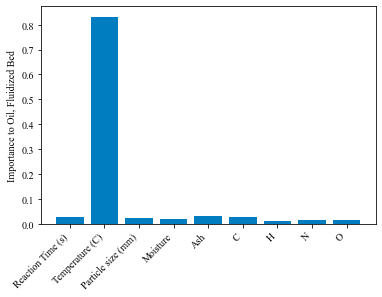

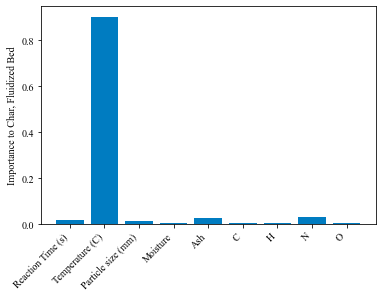

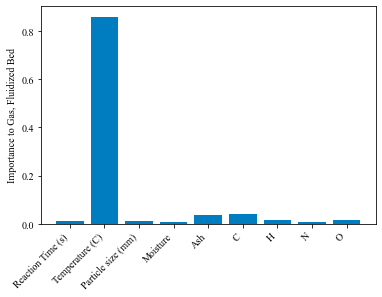

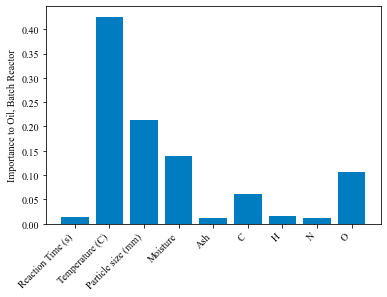

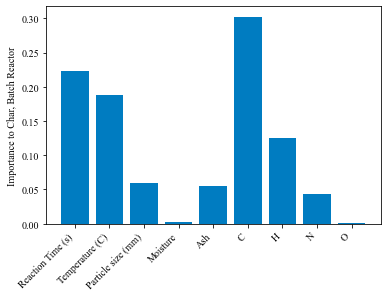

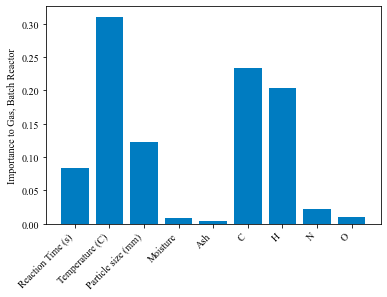

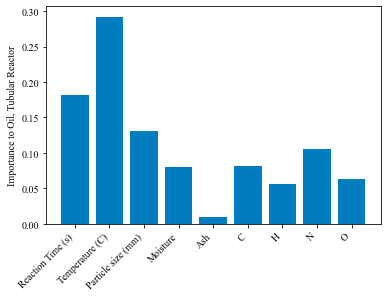

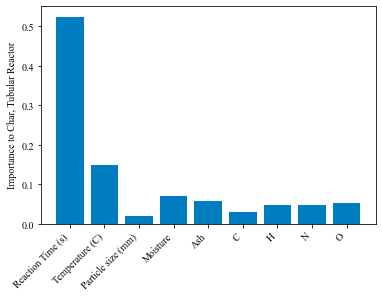

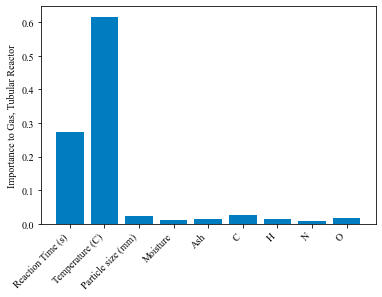

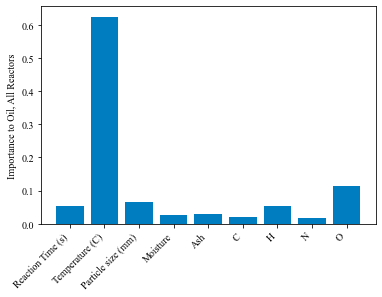

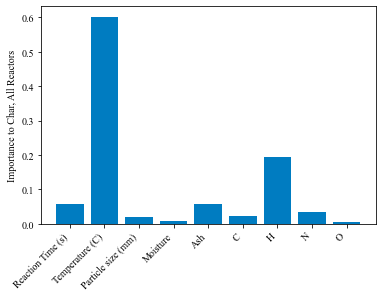

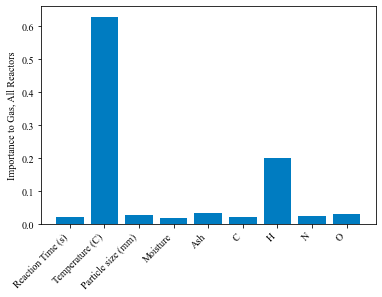

In [16]:
# Plot results
from matplotlib import pyplot as plt

def plot_importance(row: dict):

    _reactor = row['Reactor Type']
    _target = row['Target Variable']
    _imp_vals = [row[inp] for inp in INPUT_VARS]

    plt.clf()
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.ylabel(f'Importance to {_target}, {_reactor}')
    plt.bar(INPUT_VARS, _imp_vals, color=(0, 114/235, 178/235))
    plt.xticks(rotation=45, ha='right')
    plt.show()

for row in results:
    plot_importance(row)